# Collaborative filtering

## Material

* http://scikit-learn.org/stable/auto_examples/neural_networks/plot_rbm_logistic_classification.html
* http://www.pyimagesearch.com/2014/06/23/applying-deep-learning-rbm-mnist-using-python/

In [23]:
RANDOM_STATE = 0

from code.bernoulli_rbm import BernoulliRBM

rbm = BernoulliRBM(random_state=RANDOM_STATE, verbose=True)

rbm.batch_size = 250
rbm.learning_rate = 0.08
rbm.n_iter = 50
rbm.n_components = 50 #400 # hidden units

## Data

In [24]:
class NONE:
    index = 107
    name = 'None'

import pandas as pd

plugins = pd.read_csv('data/plugin-category.csv', index_col='id').sort_index()
pedalboards = pd.read_csv('data/pedalboard-plugin-bag-of-words.csv', index_col=['index', 'id'])


# Alterar o nome da coluna de plugin 
plugins_copy = plugins.copy()
plugins_copy['Plugin'] = plugins_copy.name
plugins_copy['Category'] = plugins_copy.category

pedalboards.columns = [plugins_copy.Category, plugins_copy.Plugin]

# Remover None
#plugins_sem_none = plugins.drop(plugins.index[NONE.index])
#del pedalboards[NONE.name, NONE.name]
pedalboards[NONE.name, NONE.name] = 0

pedalboards.head(3)

Category   Filter_EQ Modulation     SFX Modulation    Delay            \
Plugin      M-Filter    TheVibe Z-Organ     Slicer PhaseDly FilterDly   
index id                                                                
0     9467         0          0       0          0        0         0   
1     8913         0          0       0          0        0         0   
2     7313         0          0       0          0        0         0   

Category                      Modulation    SFX  ...   None Amp Modeling  \
Plugin     PitchDly StereoDly   BitCrush Bomber  ...   None    TONE CITY   
index id                                         ...                       
0     9467        0         0          0      0  ...      0            0   
1     8913        0         0          0      0  ...      0            0   
2     7313        0         0          0      0  ...      0            0   

Category                                                                       
Plugin     B-BREAKER BGN DRIVE DELUXE-R ALIEN REVO-1 CAR DRIVE MS 1959 VX JMI  
index id                                                                       
0     9467         1         0        0     0      0         0       0      0  
1     8913         0         0        0     0      0         0       0      0  
2     7313         0         0        0     0      0         0       0      0  

[3 rows x 117 columns]

In [25]:
from sklearn.model_selection import train_test_split

pedalboards_train, pedalboards_test = train_test_split(pedalboards, train_size=.8, random_state=RANDOM_STATE)

## Training

In [26]:
from sklearn.pipeline import Pipeline

#classifier = Pipeline(steps=[('rbm', rbm)])
#classifier.fit(pedalboards_train)

rbm.fit(pedalboards_train)#.score_samples(pedalboards_train).mean()
rbm.log

[BernoulliRBM] Iteration 1, pseudo-likelihood = -24.65, time = 0.11s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -18.45, time = 0.09s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -15.66, time = 0.10s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -15.10, time = 0.15s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -15.06, time = 0.13s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -15.03, time = 0.16s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -15.09, time = 0.14s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -15.09, time = 0.20s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -15.03, time = 0.13s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -15.02, time = 0.10s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -15.02, time = 0.12s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -15.00, time = 0.12s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -15.00, time = 0.14s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -14.94, time = 0.09s
[BernoulliRBM] Iteration 15, 

,pseudo-likelihood,time
1,-24.650305,0.110708
2,-18.453850,0.091886
3,-15.662731,0.096341
4,-15.099265,0.152112
5,-15.064931,0.131088
6,-15.033821,0.158228
7,-15.090735,0.135522
8,-15.085262,0.196501
9,-15.028951,0.126836
10,-15.015338,0.100011


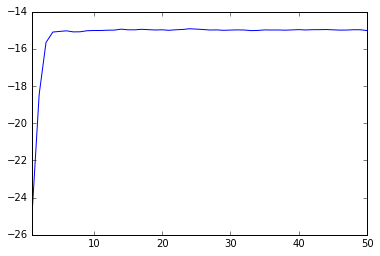

In [28]:
%matplotlib inline
plt = rbm.log['pseudo-likelihood'].plot()
plt#.set_xscale('log')

## Sampling

In [8]:
from IPython.display import display, HTML

def show_pedalboard(pedalboard, plugins):
    def make_html(image):
        return '<img src="images/{}.png" style="display:inline;margin:1px"/>'.format(image)

    images = list(plugins[pedalboard == True].index)
    return display(HTML(''.join(make_html(image) for image in images)))

def category_of_pedalboard(plugins, pedalboard):
    return plugins[pedalboard == True]

In [9]:
original = pedalboards_train.iloc[1].values
show_pedalboard(original, plugins)
category_of_pedalboard(plugins, original)

,name,category
id,,
27,ZNR,Dynamics
30,GraphicEQ,Filter_EQ
54,TapeEcho,Delay
64,Arena,Reverb
73,T Scream,Stomp Modeling
98,MS CRUNCH,Amp Modeling


In [10]:
entrada = original

total = 1
while rbm.score_samples([entrada]) < -.1 or total < 10:
    #print(total, rbm.score_samples([entrada]))
    entrada = rbm.gibbs(entrada)
    total += 1

show_pedalboard(entrada, plugins)
category_of_pedalboard(plugins, entrada)

KeyboardInterrupt: 

## Teste 2

In [ ]:
import numpy as np
pedalboard_treino = np.zeros(117, dtype=np.bool)

pedalboard_treino[27] = 1
pedalboard_treino[107] = 1

resultado = pedalboard_treino

total = 1
while rbm.score_samples([resultado]) < -.1 or total < 10:
    total += 1

    resultado |= pedalboard_treino
    resultado = rbm.gibbs(resultado)

show_pedalboard(pedalboard_treino, plugins)
show_pedalboard(resultado, plugins)
category_of_pedalboard(plugins, resultado)

## testando

In [ ]:
'''
RANDOM_STATE = 0

from sklearn.neural_network import BernoulliRBM

rbm = BernoulliRBM(random_state=RANDOM_STATE, verbose=True)

rbm.learning_rate = 0.06
rbm.n_iter = 20
rbm.n_components = 1 # hidden units

pedalboards_train = [list([1,1,0,0]) for i in range(100)] + [list([0,0,1,0]) for i in range(10)]

rbm.fit(pedalboards_train)

entrada = [0, 0, 0, 0]
for _ in range(10000):
    entrada = rbm.gibbs(entrada)

entrada
'''

## Evaluation - how to?

In [14]:
original = pedalboards_train.iloc[214].values.copy()

index = plugins[original == True].index
train, test = train_test_split(index, train_size=.5)

original_train = original.copy()
original_test = original.copy()
original_train[test] = 0
original_test[train] = 0

print('Pedalboard')
show_pedalboard(original, plugins)
print('Train')
show_pedalboard(original_train, plugins)

Pedalboard


Train


In [ ]:
def recommend(pedalboard, score=-.08, size=None):
    len_pedalboard = lambda pedalboard: len(pedalboard[pedalboard == True])
    if size is None:
        size = len_pedalboard(original)

    result = original
    while True:
        #result |= result
        result = rbm.gibbs(result)
        if (rbm.score_samples([result]) > score
        and len_pedalboard(result) == size):
            break

    return result

recommended = recommend(original_train, score=-1)

show_pedalboard(recommended, plugins)

In [15]:
from code.experiment import Experiment

experiment = Experiment(rbm)
experiment.recommend(train)

NameError: name '_recommend_condition' is not defined

In [ ]:
def evaluate(recommended, train, test, original):
    def len_of(element):
        return len(element[element == True])
    
    preserve = 0 if len_of(train) == 0 else len_of(train & recommended) / len_of(train)
    discover = 0 if len_of(test)  == 0 else len_of(test & recommended) / len_of(test)
    total = 0 if len_of(original) == 0 else len_of(original & recommended) / len_of(original)
    
    return preserve, discover, total

evaluate(recommended, original_train, original_test, original)

In [20]:
def mensure(pedalboards, plugins):
    results_train = pd.DataFrame(columns=('preserve', 'discover', 'total'))
    
    for position, pedalboard_index in enumerate(pedalboards.index):
        pedalboard = pedalboards.iloc[position].values.copy()

        index = plugins[pedalboard == True].index
        effects_train, effects_test = train_test_split(index, train_size=.5)

        pedalboard_train = pedalboard.copy()
        pedalboard_test = pedalboard.copy()
        pedalboard_train[effects_test] = 0
        pedalboard_test[effects_train] = 0

        recommended = recommend(pedalboard_train, score=-1)
        results_train.loc[pedalboard_index[0]] = evaluate(recommended, pedalboard_train, pedalboard_test, pedalboard)
    
    return results_train

result = mensure(pedalboards_train, plugins)
result

,preserve,discover,total
2191,0.000000,0.333333,0.166667
1368,0.666667,1.000000,0.833333
1817,0.333333,0.000000,0.166667
731,0.000000,0.500000,0.250000
2535,0.000000,0.333333,0.166667
2311,0.000000,0.000000,0.000000
125,1.000000,0.000000,0.333333
1819,0.000000,0.666667,0.333333
1266,0.000000,0.000000,0.000000
892,0.000000,0.333333,0.200000


In [21]:
result.mean()

preserve    0.180476
discover    0.182950
total       0.182280
dtype: float64

In [22]:
test = mensure(pedalboards_test, plugins)
test

,preserve,discover,total
2060,0.000000,0.000000,0.000000
2419,0.000000,0.000000,0.000000
192,0.000000,0.000000,0.000000
2531,0.000000,0.000000,0.000000
913,0.000000,0.333333,0.200000
1101,0.000000,0.000000,0.000000
2228,0.500000,0.000000,0.250000
2365,0.000000,0.666667,0.333333
1543,0.500000,0.000000,0.250000
2266,0.000000,0.000000,0.000000


In [26]:
test.mean()

preserve    0.181963
discover    0.165073
total       0.173518
dtype: float64